In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

- Tratamiento de los dos data que hablan sobre movimientos de los usuarios

In [2]:
df1 = pd.read_csv('CSV/df_final_web_data_pt_1.txt')

In [3]:
df2 = pd.read_csv('CSV/df_final_web_data_pt_2.txt')

In [4]:
df1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [5]:
df2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

- Tratamiento del demo final 

In [6]:
df_web_data = pd.concat([df1, df2], axis=0)

In [7]:
demo = pd.read_csv("CSV/df_final_demo.txt", low_memory=False)

In [8]:
demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [9]:
demo = demo.fillna('Unknown')

In [10]:
demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [11]:
frequency_gendr = demo['gendr'].value_counts()
frequency_gendr

gendr
U          24122
M          23724
F          22746
Unknown       14
X              3
Name: count, dtype: int64

In [12]:
frequency_table2 = demo['gendr'].value_counts(normalize=True).head(3)

In [13]:
demo['clnt_age'] = pd.to_numeric(demo['clnt_age'], errors='coerce')


In [14]:
demo_filtrado = demo[demo['clnt_age'].between(20, 80)]

In [15]:
demo_filtrado.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

<Axes: xlabel='clnt_age', ylabel='Count'>

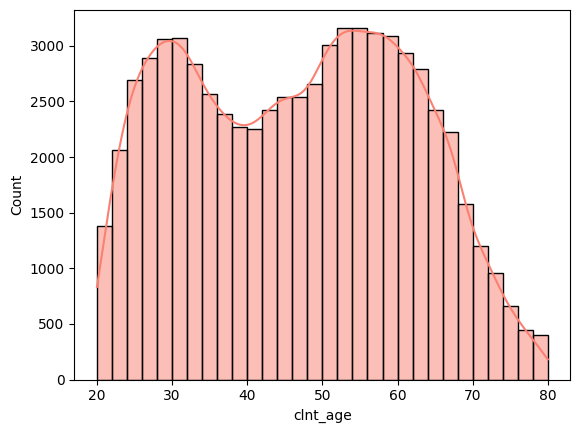

In [16]:
sns.histplot(demo_filtrado['clnt_age'], kde=True, bins=30, color="salmon")

In [17]:
demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\3113405766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


In [18]:
demo_filtrado['bal'] = demo_filtrado['bal'].round(2)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\672603886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = demo_filtrado['bal'].round(2)


In [19]:
demo_filtrado

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### EMPEZAR A BUSCAR RELACIÓN ENTRE LAS COLUMNAS. RELACIÓN + GRÁFICO

In [20]:
frequency_bal = demo_filtrado['bal'].value_counts()

proportion_bal = demo_filtrado['bal'].value_counts(normalize=True)

frequency_bal, proportion_bal

(bal
 31188.62     5
 29388.51     4
 31398.74     3
 29389.11     3
 24953.79     3
             ..
 135143.26    1
 25561.22     1
 41751.20     1
 32797.00     1
 522498.72    1
 Name: count, Length: 68510, dtype: int64,
 bal
 31188.62     0.000073
 29388.51     0.000058
 31398.74     0.000044
 29389.11     0.000044
 24953.79     0.000044
                ...   
 135143.26    0.000015
 25561.22     0.000015
 41751.20     0.000015
 32797.00     0.000015
 522498.72    0.000015
 Name: proportion, Length: 68510, dtype: float64)

Convertir los object en float:

In [21]:
cols_to_fix = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 
               'calls_6_mnth', 'logons_6_mnth']

for col in cols_to_fix:
    demo_filtrado[col] = (
        demo_filtrado[col]
        .astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)  
        .str.strip()                              
        .replace('', None)                        
        .astype(float)                             
    )


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [22]:
frequency_cuentas = demo_filtrado['num_accts'].value_counts()
frequency_cuentas

num_accts
2.0    54049
3.0    12192
4.0     2201
5.0      281
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

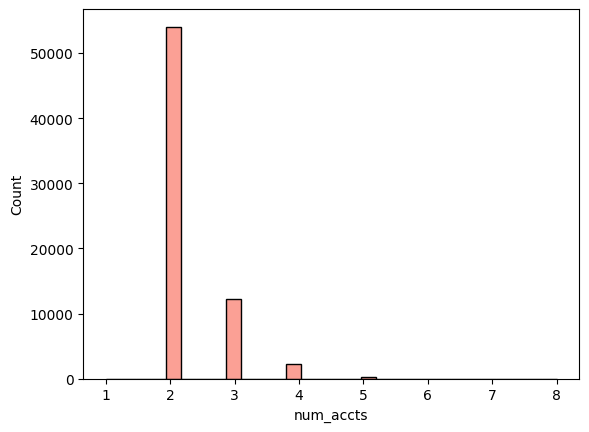

In [23]:
sns.histplot(demo_filtrado['num_accts'], bins=30, color="salmon")

In [24]:
frequency_llamadas = demo_filtrado['calls_6_mnth'].value_counts()
frequency_llamadas

calls_6_mnth
6.0    13818
1.0    10741
2.0     9944
3.0     8492
0.0     7585
4.0     6935
5.0     6484
7.0     4768
Name: count, dtype: int64

<Axes: xlabel='calls_6_mnth', ylabel='Count'>

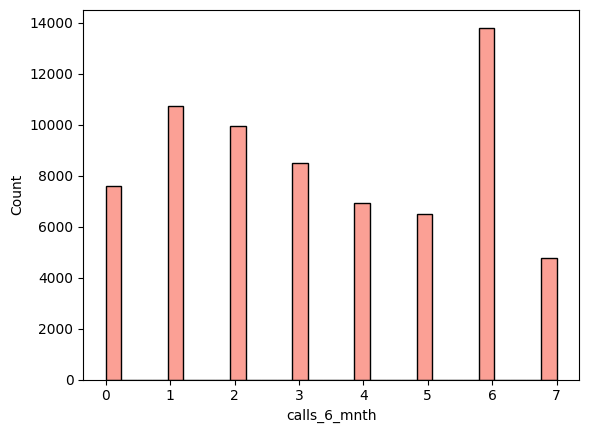

In [25]:
sns.histplot(demo_filtrado['calls_6_mnth'], color="salmon")

In [26]:
frequency_entradas = demo_filtrado['logons_6_mnth'].value_counts()
frequency_entradas

logons_6_mnth
9.0    12133
3.0     9973
4.0     9939
7.0     9624
5.0     9008
6.0     7667
8.0     4737
2.0     2861
1.0     2825
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

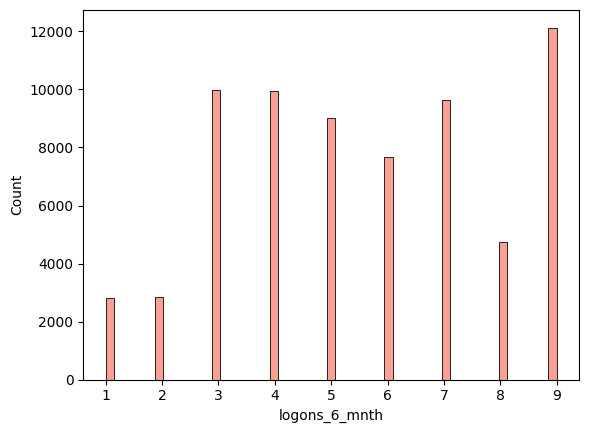

In [27]:
sns.histplot(demo_filtrado['logons_6_mnth'], color="salmon")

In [28]:
frequency_años = demo_filtrado['clnt_tenure_yr'].value_counts()
frequency_años

clnt_tenure_yr
6.0     6876
5.0     6636
7.0     4864
15.0    4501
4.0     4409
8.0     3983
14.0    3610
12.0    3601
13.0    3572
9.0     3308
11.0    2894
10.0    2754
16.0    2664
21.0    2179
20.0    1531
22.0    1442
17.0    1349
23.0    1222
18.0    1184
19.0    1133
24.0     810
26.0     630
27.0     599
28.0     483
25.0     461
3.0      418
30.0     293
29.0     293
33.0     195
32.0     181
34.0     168
31.0     161
35.0     101
2.0       76
36.0      36
37.0      33
38.0      31
48.0      16
55.0       9
40.0       9
50.0       7
39.0       7
42.0       6
43.0       6
47.0       6
46.0       4
51.0       4
49.0       4
44.0       2
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

CON ESTO PODEMOS SABER CUANTOS AÑOS LLEVAN UNA GRAN PARTE DE NUESTROS CLIENTES, EN EL QUE SE PUEDE VER QUE SOBRESALEN 5 Y 6 AÑOS

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

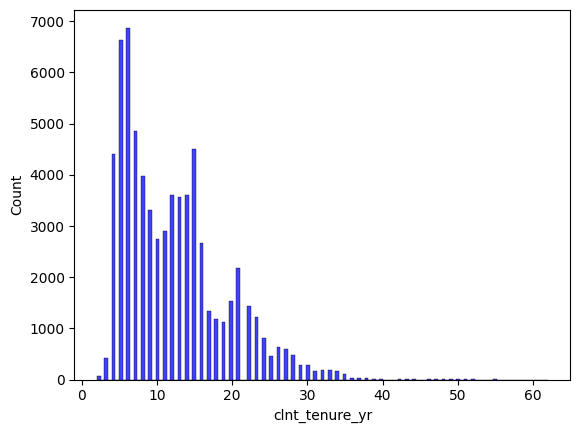

In [29]:
sns.histplot(demo_filtrado['clnt_tenure_yr'], color="blue")

#### -Lo que nos muestra este gráfico que hay más dinero en los clientes que tienen de 5 a 7 cuentas.

## CORRELACIÓN ENTRE EDAD DEL CLIENTE Y LOGUEOS EN LOS ÚLTIMOS 6 MESES.

In [30]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation

np.float64(0.06945918370318671)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\3343306363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['edad_rango'] = pd.cut(demo_filtrado['clnt_age'], bins=bins)
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\3343306363.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = demo_filtrado.groupby('edad_rango')['logons_6_mnth'].mean().reset_index()


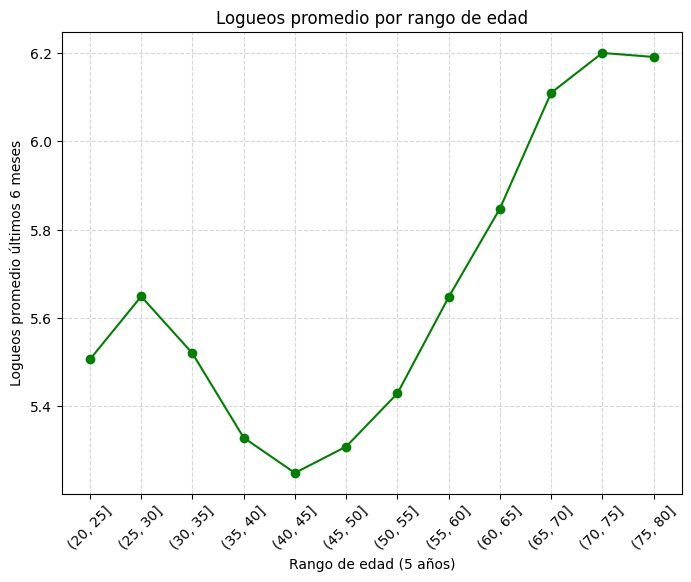

In [31]:
# Definir los límites de los rangos de edad (cada 5 años)
edad_min = demo_filtrado['clnt_age'].min()
edad_max = demo_filtrado['clnt_age'].max()
bins = list(range(int(edad_min), int(edad_max)+5, 5))

# Crear los rangos
demo_filtrado['edad_rango'] = pd.cut(demo_filtrado['clnt_age'], bins=bins)

# Calcular logueos promedio por rango de edad
resumen = demo_filtrado.groupby('edad_rango')['logons_6_mnth'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(resumen['edad_rango'].astype(str), resumen['logons_6_mnth'], marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel('Rango de edad (5 años)')
plt.ylabel('Logueos promedio últimos 6 meses')
plt.title('Logueos promedio por rango de edad')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Se ha calculado la correlación de Spearman entre la edad del cliente (clnt_age) y el número de logueos en los últimos 6 meses (logons_6_mnth).

Resultado: 
- Coeficiente de Spearman: 0.0694

Interpretación:
- El valor es muy cercano a 0, lo que indica una relación prácticamente nula entre la edad del cliente y la frecuencia de logueos.
- No se observa un patrón consistente de que los clientes más jóvenes o más mayores inicien sesión con más frecuencia.
- Dado que Spearman mide la correlación de rangos, este resultado indica que el orden relativo de edades no se asocia significativamente con el orden relativo del número de logueos.

Conclusión: 
- La edad del cliente no parece ser un factor determinante en la actividad de logueo de los últimos 6 meses.

## CORRELACIÓN ENTRE LLAMADAS Y LOGUEOS EN LOS ÚLTIMOS 6 MESES.

In [32]:
correlation2 = demo_filtrado['calls_6_mnth'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation2

np.float64(0.8301436005646146)

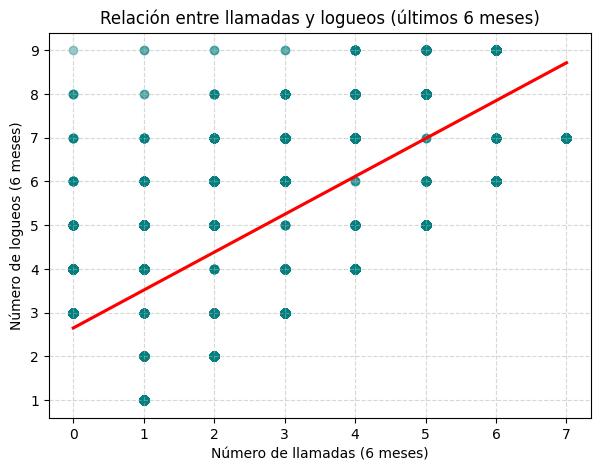

In [69]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=demo_filtrado,
    x='calls_6_mnth',
    y='logons_6_mnth',
    scatter_kws={'alpha':0.4, 'color':'teal'},
    line_kws={'color':'red'}
)
plt.title('Relación entre llamadas y logueos (últimos 6 meses)')
plt.xlabel('Número de llamadas (6 meses)')
plt.ylabel('Número de logueos (6 meses)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Resultado: 
- Coeficiente de Spearman: 0.8301

Interpretación: 
- El valor es muy cercano a 1, lo que indica una correlación positiva fuerte. 
- Esto significa que, en general, los clientes que realizan más llamadas tienden también a iniciar sesión más veces.

Conclusión: 
- Existe una relación consistente entre la frecuencia de llamadas y la frecuencia de logueos, lo que puede reflejar que los clientes más activos utilizan múltiples canales de interacción. 


## CORRELACIÓN ENTRE EDAD DEL CLIENTE Y BALANCE

In [34]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['bal'], method= 'spearman')
correlation

np.float64(0.3234754725681508)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\3145844023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['edad_rango'] = pd.cut(demo_filtrado['clnt_age'], bins=10)
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\3145844023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = demo_filtrado.groupby('edad_rango')['bal'].agg(['mean','median']).reset_index()


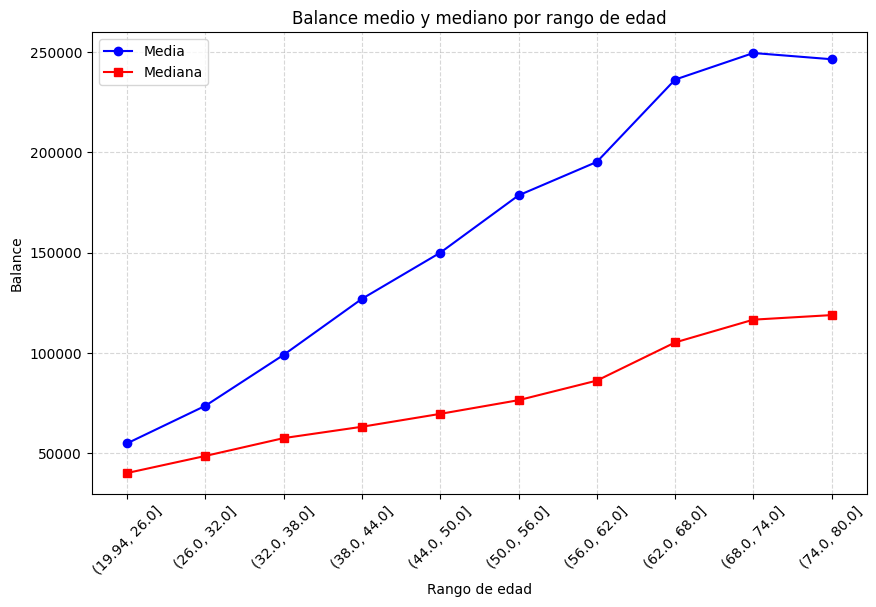

In [35]:
# Crear rangos de edad (bins)
demo_filtrado['edad_rango'] = pd.cut(demo_filtrado['clnt_age'], bins=10)

# Calcular media y mediana del balance por rango de edad
resumen = demo_filtrado.groupby('edad_rango')['bal'].agg(['mean','median']).reset_index()

# Graficar la media y mediana
plt.figure(figsize=(10,6))
plt.plot(resumen['edad_rango'].astype(str), resumen['mean'], marker='o', label='Media', color='blue')
plt.plot(resumen['edad_rango'].astype(str), resumen['median'], marker='s', label='Mediana', color='red')
plt.xticks(rotation=45)
plt.xlabel('Rango de edad')
plt.ylabel('Balance')
plt.title('Balance medio y mediano por rango de edad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



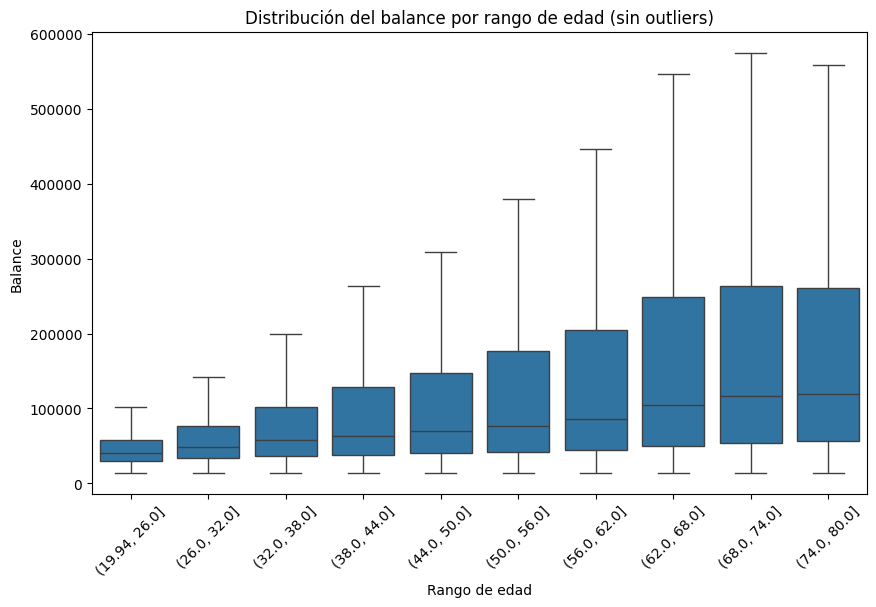

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='edad_rango', y='bal', data=demo_filtrado, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('Rango de edad')
plt.ylabel('Balance')
plt.title('Distribución del balance por rango de edad (sin outliers)')
plt.show()


Resultado:
- Coeficiente de Spearman: 0.3235

Interpretación: 
- El valor indica una correlación positica moderada-baja.
- Esto significa que, a medida que aumenta la edad del cliente, tiende a aumentar también su balance, aunque la relación no es muy fuerte.

Conclusión: 
- La edad tiene cierta relación con el balance, pero no es un factor determinante.

## CORRELACIÓN ENTRE NÚMERO DE CUENTAS Y BALANCE

In [37]:
corr = demo_filtrado[['num_accts','bal']].corr(method='spearman')
corr


,num_accts,bal
num_accts,1.000000,0.332308
bal,0.332308,1.000000


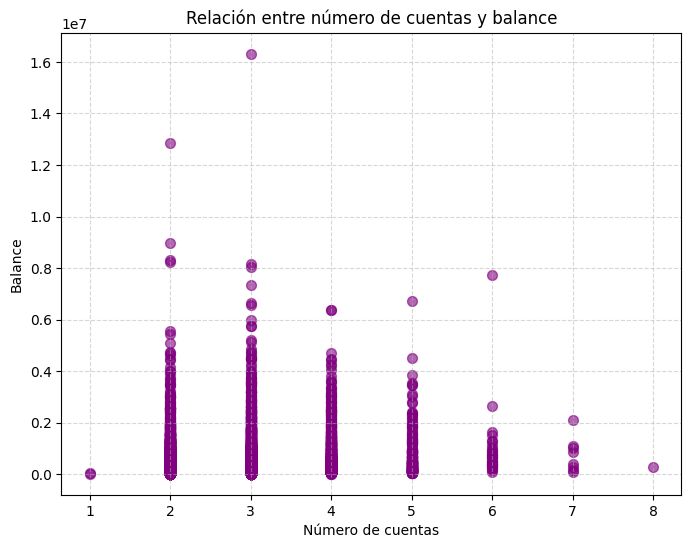

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(demo_filtrado['num_accts'], demo_filtrado['bal'], alpha=0.6, s=50, color='purple')
plt.xlabel('Número de cuentas')
plt.ylabel('Balance')
plt.title('Relación entre número de cuentas y balance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\1339818439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_accts', y='bal', data=demo_filtrado, palette='Blues', showfliers=True)


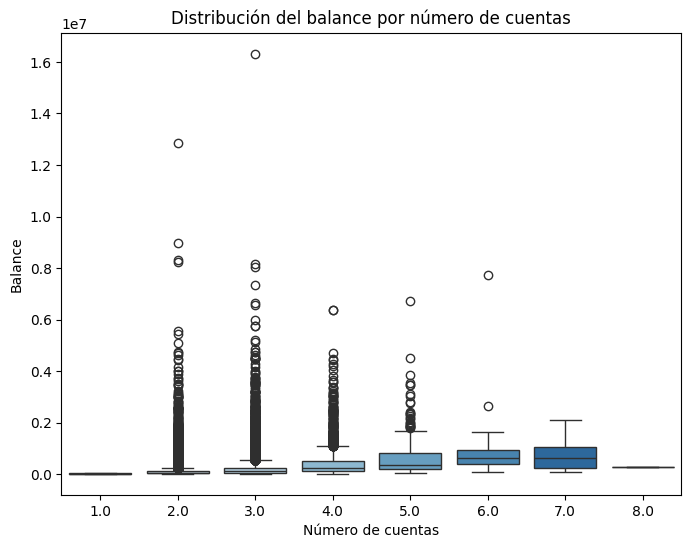

In [39]:

plt.figure(figsize=(8,6))
sns.boxplot(x='num_accts', y='bal', data=demo_filtrado, palette='Blues', showfliers=True)
plt.xlabel('Número de cuentas')
plt.ylabel('Balance')
plt.title('Distribución del balance por número de cuentas')
plt.show()


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\1056334394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num_accts', y='bal', data=demo_filtrado, palette='Purples', inner='quartile')


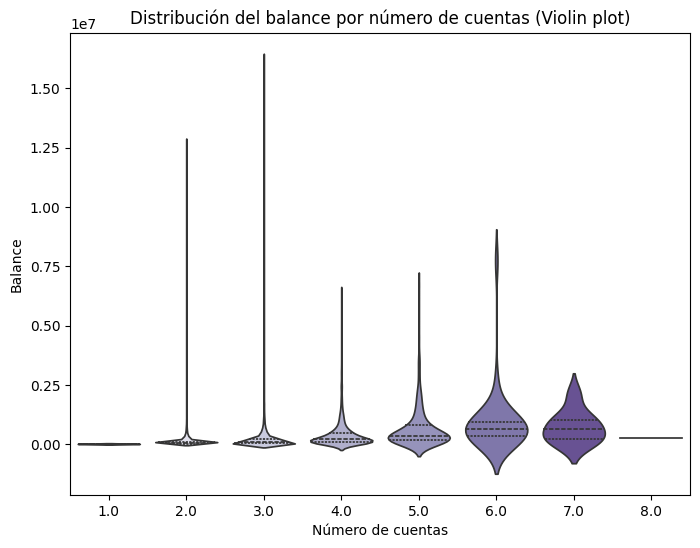

In [40]:
plt.figure(figsize=(8,6))
sns.violinplot(x='num_accts', y='bal', data=demo_filtrado, palette='Purples', inner='quartile')
plt.xlabel('Número de cuentas')
plt.ylabel('Balance')
plt.title('Distribución del balance por número de cuentas (Violin plot)')
plt.show()


Resultado: 
- Coeficiente de Spearman: 0.3323

Interpretación: 
- El valor indica una correlación positiva baja-moderada.
- Esto significa que, a mayor número de cuentas, los clientes tienden a tener balances más altos, aunque la relación no es muy fuerte.

Conclusión:
- Tener más cuentas se asocia parcialmente con un balance mayor, pero no es un factor determinante.

## CORRELACIÓN ENTRE ANTIGÜEDAD DEL CLIENTE Y SU BALANCE

In [41]:
correlation5 = demo_filtrado['clnt_tenure_yr'].corr(demo_filtrado['bal'], method='spearman')
correlation5

np.float64(0.26608372289098065)

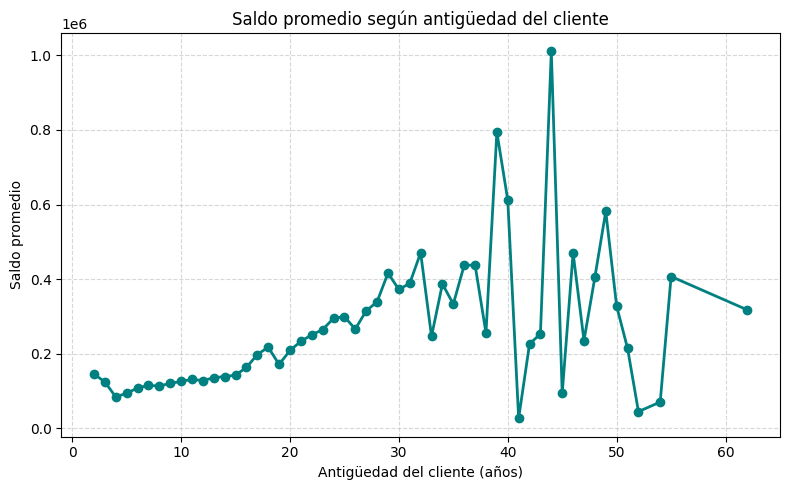

In [73]:
resumen = demo_filtrado.groupby('clnt_tenure_yr')['bal'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(
    resumen['clnt_tenure_yr'],
    resumen['bal'],
    marker='o',
    color='teal',
    linewidth=2,
    markersize=6
)
plt.title('Saldo promedio según antigüedad del cliente')
plt.xlabel('Antigüedad del cliente (años)')
plt.ylabel('Saldo promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Resultado: 0.2661

Intepretación: 
- La correlación de Spearman es positiva pero baja.
- Esto indica que, los clientes con más años de antigüedad tienden a tener balances ligeramente más altos. 

Conclusión: 
- Los clientes con más antigüedad tienden a tener balances algo mayores, pero la relación no es fuerte ni determinante.

## CORRELACIÓN ENTRE LA EDAD DEL CLIENTE Y EL NÚMERO DE CUENTAS

In [42]:
correlation6 = demo_filtrado['clnt_age'].corr(demo_filtrado['num_accts'], method='spearman')
correlation6

np.float64(-0.028721715866273045)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\224758470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='num_accts'>

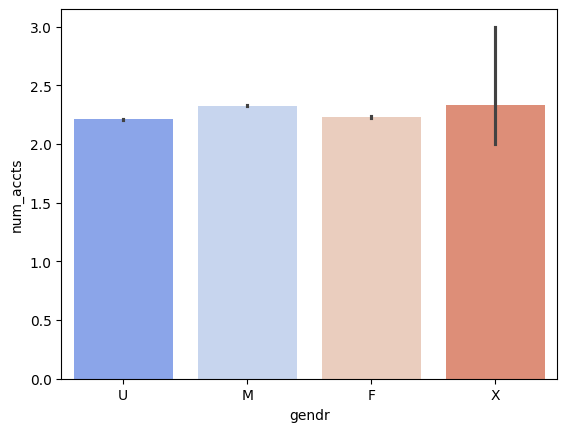

In [43]:
sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")

Resultado: 
- -0.0287
- Esto indica que no existe una relación significativa entre la edad del cliente y el número de cuentas que posee.

Conclusión: 
- La edad no influye de manera relevante en cuántas cuentas tiene un cliente: tanto jóvenes como mayores presentan números similares de cuentas.

## CORRELACIÓN ENTRE LA EDAD DEL CLIENTE Y SU ANTIGÜEDAD.


In [44]:
correlation7 = demo_filtrado['clnt_age'].corr(demo_filtrado['clnt_tenure_yr'], method='spearman')
correlation7

np.float64(0.2907774365775862)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\1136878078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='edad_rango', y='clnt_tenure_yr', data=demo_filtrado, palette='Blues')


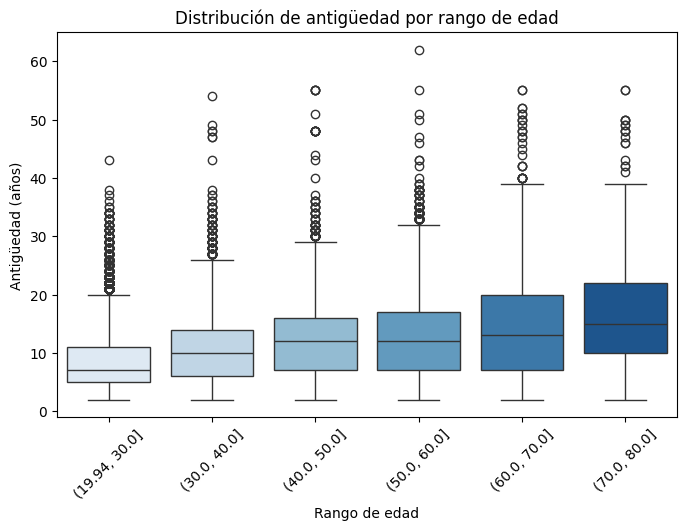

In [71]:
demo_filtrado['edad_rango'] = pd.cut(demo_filtrado['clnt_age'], bins=6)

plt.figure(figsize=(8,5))
sns.boxplot(x='edad_rango', y='clnt_tenure_yr', data=demo_filtrado, palette='Blues')
plt.xticks(rotation=45)
plt.title('Distribución de antigüedad por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Antigüedad (años)')
plt.show()

Resultado: 
- 0.2908

Interpretación: 
- El coeficiente de Spearman muestra una correlación positiva baja-moderada.
- Esto significa que, los clientes de mayor edad tienden a llevar más tiempo en la entidad, aunque la relación no es muy fuerte.
- Es una tendencia esperable, ya que las personas mayores suelen haber sido clientes por más años, pero no todos los clientes mayores tienen necesariamente más antigüedad.

Conclusión: 
- Existe una relación positiva pero no determinante entre la edad y la antigüedad.

## SUBIDA DE LOS OTROS ARCHIVOS Y UNIÓN

In [45]:
df1 = pd.read_csv('CSV/df_final_experiment_clients.txt')
df1

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


#### TRATAMIENTO DEL CSV PARA SABER VALORES NULOS Y COMO TRATARLOS

In [46]:
df1.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [47]:
frequency_df1 = df1['Variation'].value_counts()
frequency_df1

Variation
Test       26968
Control    23532
Name: count, dtype: int64

Se eliminan las filas que no contenen información en la columna Variation, ya que no aportan valor al análisis y podrían generar errores en los resultados.

In [48]:
df1_filtrado = df1[df1['Variation'].isin(['Control', 'Test'])]
df1_filtrado

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


#### MERGE ENTRE DEMO (NUESTRO ORIGINAL (demo_filtrado) - Y EL CSV TEST/CONTROL (df1_filtrado))

In [ ]:
demo_unido = pd.merge(df1_filtrado, demo_filtrado, on='client_id', how='inner')
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,edad_rango
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,"(70.0, 80.0]"
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,"(30.0, 40.0]"
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,"(60.0, 70.0]"
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,"(40.0, 50.0]"
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,"(19.94, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...
49507,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0,"(50.0, 60.0]"
49508,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,"(30.0, 40.0]"
49509,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0,"(60.0, 70.0]"
49510,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0,"(30.0, 40.0]"


In [76]:
demo_unido = demo_unido.drop(columns=['edad_rango'])

### Que cliente promedio tenemos?

In [78]:
demo_unido= demo_unido[demo_unido['clnt_age'].between(18, 100)]
demo_unido = demo_unido[demo_unido['bal'] > 0]

In [79]:
demo_unido[['clnt_age']].describe()

,clnt_age
count,49512.000000
mean,47.216432
std,14.955571
min,20.000000
25%,33.500000
50%,48.000000
75%,59.500000
max,80.000000


In [80]:
demo_unido[['calls_6_mnth']].describe()


,calls_6_mnth
count,49512.000000
mean,3.095775
std,2.189106
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [81]:
demo_unido[['logons_6_mnth']].describe()

,logons_6_mnth
count,49512.000000
mean,6.133826
std,2.176677
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,9.000000


In [82]:
demo_unido[['clnt_tenure_yr']].describe()

,clnt_tenure_yr
count,49512.000000
mean,12.006705
std,6.806634
min,2.000000
25%,6.000000
50%,11.000000
75%,15.000000
max,55.000000


In [83]:
demo_unido[['num_accts']].describe()

,num_accts
count,49512.000000
mean,2.255130
std,0.534772
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,7.000000


In [84]:
demo_unido[['bal']].mean()

bal    149309.171934
dtype: float64

In [85]:
demo_unido[['bal']].median()

bal    66011.685
dtype: float64

In [86]:
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
49507,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
49508,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
49509,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
49510,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [87]:
perfil_por_grupo = demo_unido.groupby('Variation')[
    ['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']
].agg(['mean', 'median'])
perfil_por_grupo


clnt_age                   bal            num_accts         \
                mean median           mean     median      mean median   
Variation                                                                
Control    47.390672   48.5  149612.373141  66309.225  2.260766    2.0   
Test       47.064264   47.5  149044.378507  65667.305  2.250208    2.0   

          clnt_tenure_yr        logons_6_mnth        calls_6_mnth         
                    mean median          mean median         mean median  
Variation                                                                 
Control        12.061823   11.0      6.169483    6.0     3.132744    3.0  
Test           11.958570   11.0      6.102686    6.0     3.063488    3.0

In [90]:
age_median = demo_unido['clnt_age'].median()
age_median

np.float64(48.0)

In [91]:
cliente_objetivo = demo_unido[
    (demo_unido['logons_6_mnth'] > demo_unido['logons_6_mnth'].median()) &
    (demo_unido['clnt_age'] < age_median) &
    (demo_unido['bal'] > demo_unido['bal'].median())]

In [92]:
cliente_objetivo

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
10,438567,Test,15.0,186.0,38.0,M,2.0,89161.52,6.0,9.0
21,9987707,Test,28.0,341.0,46.5,M,3.0,88607.54,6.0,9.0
25,2317698,Test,15.0,184.0,42.5,F,2.0,116894.92,5.0,8.0
33,8766054,Test,12.0,153.0,26.0,M,2.0,76660.36,4.0,7.0
36,1242238,Control,11.0,139.0,25.0,M,3.0,72557.70,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...
49444,3667184,Test,14.0,179.0,44.0,F,2.0,76827.15,6.0,9.0
49448,2856801,Test,15.0,183.0,33.0,M,2.0,115738.55,6.0,9.0
49457,7511753,Test,14.0,172.0,42.5,F,2.0,256153.18,6.0,9.0
49494,5931031,Test,11.0,142.0,30.5,M,3.0,66331.70,5.0,8.0


In [93]:
comparacion = pd.DataFrame({
    'Promedio general': demo_unido[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean(),
    'Cliente objetivo': cliente_objetivo[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean()
})
comparacion


,Promedio general,Cliente objetivo
clnt_age,47.216432,35.758848
bal,149309.171934,206398.397267
num_accts,2.255130,2.645671
clnt_tenure_yr,12.006705,11.761648
logons_6_mnth,6.133826,8.415117
calls_6_mnth,3.095775,5.393921


#### HEMOS CONVERTIDO NUESTROS DOS DATAS EN FLOAT TODAS LAS COLUMNAS QUE NOS INTERESABAN, Y HEMOS RELLENADO SUS VALORES NULOS CON LA MEDIANA DE CADA RESPECTIVA COLUMNA.

In [101]:
demo_unido.dtypes

client_id             int64
Variation            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [100]:
demo_unido = demo_unido.replace("Unknown", np.nan)

In [102]:
numerical_cols = ["clnt_age", "bal", "calls_6_mnth", "logons_6_mnth", "num_accts", "clnt_tenure_yr"]

for col in numerical_cols:
    demo_unido[col] = pd.to_numeric(demo_unido[col], errors="coerce")


In [103]:
demo_unido = demo_unido.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
49507,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
49508,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
49509,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
49510,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


#### TERCER CSV PARA LIMPIAR Y UNIR

In [104]:
df2 = pd.read_csv('CSV/df_final_web_data_pt_1.txt')

In [105]:
df3 = pd.read_csv('CSV/df_final_web_data_pt_2.txt')

In [106]:
df_web = pd.concat([df2, df3], axis=0)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [107]:
total_clientes = df_web['client_id'].nunique()

completados = df_web[df_web['process_step'] == 'confirm']['client_id'].nunique()

tasa_total = completados / total_clientes * 100
print(f"Tasa de finalización total: {tasa_total:.2f}%")


Tasa de finalización total: 67.53%


In [109]:
grupo_de_control = pd.merge(df_web, df1_filtrado, on= 'client_id', how = 'inner')
grupo_de_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


Para saber cuánta gente ha completado todo el proceso.

In [110]:
# Clientes únicos por grupo
clientes_por_grupo = grupo_de_control.groupby('Variation')['client_id'].nunique()

# Clientes completados por grupo
completados_por_grupo = (
    grupo_de_control[grupo_de_control['process_step'] == 'confirm']
    .groupby('Variation')['client_id']
    .nunique()
)

# Tasa de finalización por grupo (%)
tasa_por_grupo = (completados_por_grupo / clientes_por_grupo * 100).reset_index()
tasa_por_grupo.columns = ['Variation', 'completion_rate_%']
tasa_por_grupo


,Variation,completion_rate_%
0,Control,65.587285
1,Test,69.293236


In [111]:
grupo_de_control['process_step'].value_counts()


process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

In [112]:
muestra = grupo_de_control.sort_values(by=['client_id', 'date_time'])
muestra

,client_id,visitor_id,visit_id,process_step,date_time,Variation
70803,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
70802,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
70801,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
70800,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
70799,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
...,...,...,...,...,...,...
276145,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test
276144,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test
276143,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test
244975,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test


In [113]:
# Define el orden correcto de los pasos
orden_pasos = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Crea una columna numérica con el orden
muestra['step_order'] = muestra['process_step'].apply(lambda x: orden_pasos.index(x))

# Ordena por cliente y por paso
muestra = muestra.sort_values(by=['client_id', 'step_order', 'date_time'])

In [114]:
muestra['date_time'] = pd.to_datetime(muestra['date_time'])


In [115]:
muestra['date'] = muestra['date_time'].dt.date   
muestra['time'] = muestra['date_time'].dt.time 
muestra

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_order,date,time
70803,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,2017-04-15,12:57:56
70802,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,2017-04-15,12:58:03
70801,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,2017-04-15,12:58:35
70800,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,2017-04-15,13:00:14
70799,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,2017-04-15,13:00:34
...,...,...,...,...,...,...,...,...,...
276145,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,2017-05-08,16:08:40
276144,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,2017-05-08,16:09:19
276143,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,2017-05-08,16:09:40
244975,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,2017-05-16,16:46:03


In [119]:
muestra['date_time'] = pd.to_datetime(muestra['date'] + ' ' + muestra['time'])


TypeError: unsupported operand type(s) for +: 'datetime.date' and 'str'

In [120]:
# Ordenar por cliente y fecha/hora
muestra = muestra.sort_values(['client_id', 'date_time'])

# Calcular la diferencia de tiempo entre pasos consecutivos
muestra['tiempo_entre_pasos'] = muestra.groupby('client_id')['date_time'].diff()

# Convertir la diferencia a minutos (opcional)
muestra['tiempo_entre_pasos_min'] = muestra['tiempo_entre_pasos'].dt.total_seconds() / 60


In [121]:
# Mostrar los primeros registros con los tiempos calculados
print(muestra[['client_id', 'process_step', 'tiempo_entre_pasos_min']].head(10))


        client_id process_step  tiempo_entre_pasos_min
70803         555        start                     NaN
70802         555       step_1                0.116667
70801         555       step_2                0.533333
70800         555       step_3                1.650000
70799         555      confirm                0.333333
135918        647        start                     NaN
135917        647       step_1                0.116667
135916        647       step_2                0.300000
135915        647       step_3                3.150000
135912        647      confirm                2.716667


In [126]:
# Calcular el tiempo promedio que tarda un cliente en cada paso
tiempo_promedio = muestra.groupby('process_step')['tiempo_entre_pasos_min'].median().reset_index()
print(tiempo_promedio)


  process_step  tiempo_entre_pasos_min
0      confirm                1.183333
1        start                1.600000
2       step_1                0.216667
3       step_2                0.383333
4       step_3                1.100000


In [127]:
# Ver los valores máximos y mínimos por paso
muestra.groupby('process_step')['tiempo_entre_pasos_min'].describe()


,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,42963.0,1480.642944,8326.342917,0.0,0.600000,1.183333,2.966667,139564.000000
start,54096.0,5222.657097,15454.131062,0.0,0.400000,1.600000,25.954167,130171.716667
step_1,68255.0,25.934607,1021.409401,0.0,0.116667,0.216667,0.566667,86376.800000
step_2,56861.0,1.308778,80.797968,0.0,0.183333,0.383333,0.783333,14296.633333
step_3,48634.0,11.042765,746.336988,0.0,0.616667,1.100000,1.850000,109736.000000


In [129]:
muestra['tiempo_entre_pasos'] = muestra.groupby('client_id')['date_time'].diff()
muestra[['client_id', 'process_step', 'tiempo_entre_pasos']].head(10)
tiempo_promedio = muestra.groupby('process_step')['tiempo_entre_pasos'].median()
tiempo_promedio


process_step
confirm   0 days 00:01:11
start     0 days 00:00:00
step_1    0 days 00:00:13
step_2    0 days 00:00:23
step_3    0 days 00:01:06
Name: tiempo_entre_pasos, dtype: timedelta64[ns]

In [134]:
## 🕒 Tiempo entre pasos por grupo (Test vs Control)

### 1. Calcular tiempo entre pasos
# Calcular la diferencia de tiempo entre pasos consecutivos para cada cliente
muestra['tiempo_entre_pasos'] = muestra.groupby('client_id')['date_time'].diff()

# Revisar los primeros registros
muestra[['client_id', 'Variation', 'process_step', 'tiempo_entre_pasos']].head(10)


,client_id,Variation,process_step,tiempo_entre_pasos
0,555,Test,start,NaT
1,555,Test,step_1,0 days 00:00:07
2,555,Test,step_2,0 days 00:00:32
3,555,Test,step_3,0 days 00:01:39
4,555,Test,confirm,0 days 00:00:20
5,647,Test,start,NaT
6,647,Test,step_1,0 days 00:00:07
7,647,Test,step_2,0 days 00:00:18
8,647,Test,step_3,0 days 00:03:09
9,647,Test,confirm,0 days 00:02:43


Sacamos la mediana paso a paso de cada uno de los pasos y cada tipo de Variation.

In [136]:
# Mediana del tiempo entre pasos por process_step y variation (Test / Control)
tiempo_promedio_grupos = muestra.groupby(['Variation', 'process_step'])['tiempo_entre_pasos'].median().reset_index()
tiempo_promedio_grupos


,Variation,process_step,tiempo_entre_pasos
0,Control,confirm,0 days 00:01:16
1,Control,start,0 days 00:00:00
2,Control,step_1,0 days 00:00:18
3,Control,step_2,0 days 00:00:20
4,Control,step_3,0 days 00:01:06
5,Test,confirm,0 days 00:01:06
6,Test,start,0 days 00:00:03
7,Test,step_1,0 days 00:00:11
8,Test,step_2,0 days 00:00:25
9,Test,step_3,0 days 00:01:06


In [145]:
# Separar mediana por grupo
tiempo_control = tiempo_promedio_grupos[tiempo_promedio_grupos['Variation'] == 'Control'].copy()
tiempo_test    = tiempo_promedio_grupos[tiempo_promedio_grupos['Variation'] == 'Test'].copy()


In [146]:
tiempo_control

,Variation,process_step,tiempo_entre_pasos
0,Control,confirm,0 days 00:01:16
1,Control,start,0 days 00:00:00
2,Control,step_1,0 days 00:00:18
3,Control,step_2,0 days 00:00:20
4,Control,step_3,0 days 00:01:06


In [147]:
tiempo_test

,Variation,process_step,tiempo_entre_pasos
5,Test,confirm,0 days 00:01:06
6,Test,start,0 days 00:00:03
7,Test,step_1,0 days 00:00:11
8,Test,step_2,0 days 00:00:25
9,Test,step_3,0 days 00:01:06


In [162]:
# Ordenar por process_step para evitar problemas de alineación
tiempo_control = tiempo_control.sort_values('process_step').reset_index(drop=True)
tiempo_test = tiempo_test.sort_values('process_step').reset_index(drop=True)


In [163]:
tiempo_control['segundos'] = tiempo_control['tiempo_entre_pasos'].dt.total_seconds()
tiempo_test['segundos'] = tiempo_test['tiempo_entre_pasos'].dt.total_seconds()


In [164]:
diferencia_segundos = tiempo_test['segundos'] - tiempo_control['segundos']
resultado = pd.DataFrame({
    'process_step': tiempo_test['process_step'],
    'diferencia_segundos': diferencia_segundos
})
resultado


,process_step,diferencia_segundos
0,confirm,-10.0
1,start,3.0
2,step_1,-7.0
3,step_2,5.0
4,step_3,0.0


### Los resultados negativos muestran donde el test ha sido más rápido y los resultados positivos son más rápidos en control.

Hipótesis: 
- H0 (hipótesis nula): No hay diferencia en el tiempo medio del proceso entre los grupos Control y Test.
- H1 (hipótesis alternativa): Sí hay diferencia significativa en el tiempo medio del proceso de los grupos.

In [166]:
from scipy.stats import ttest_ind

# Convertir tiempo a minutos si no lo has hecho aún
tiempo_control['tiempo_min'] = tiempo_control['tiempo_entre_pasos'].dt.total_seconds() / 60
tiempo_test['tiempo_min']    = tiempo_test['tiempo_entre_pasos'].dt.total_seconds() / 60

# Extraer las columnas de minutos
control = tiempo_control['tiempo_min']
test    = tiempo_test['tiempo_min']

# Realizar T-test (no asumimos varianzas iguales)
t_stat, p_value = ttest_ind(control, test, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")


T-statistic: 0.090, P-value: 0.93050


### Interpretación del T-test

T-statistic: 0.090 → La diferencia entre las medias de Test y Control es muy pequeña.

P-value: 0.9305 → Mucho mayor que 0.05, lo que significa que no hay evidencia estadística de que las medias sean diferentes.

Por lo tanto:

Aunque pueda parecer que Test o Control son más rápidos en algunos casos, en promedio los tiempos entre pasos son prácticamente iguales.

No podemos concluir que pertenecer a Test o Control afecte el tiempo promedio de los usuarios.

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_18620\698710727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempos_medianos = tiempos_medianos.groupby(['Variation', 'process_step'])['tiempo_segundos'].median().reset_index()


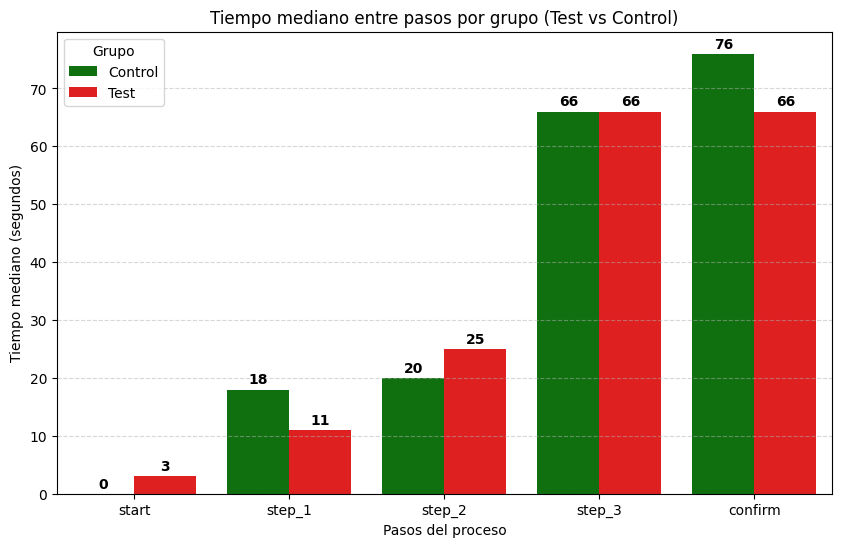

In [187]:
# Asegurarnos de tener solo una fila por step y variation
tiempos_medianos = tiempos_medianos.groupby(['Variation', 'process_step'])['tiempo_segundos'].median().reset_index()

# Definir el orden deseado de los pasos
orden_pasos = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
tiempos_medianos['process_step'] = pd.Categorical(
    tiempos_medianos['process_step'],
    categories=orden_pasos,
    ordered=True
)

# Graficar
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=tiempos_medianos,
    x='process_step',
    y='tiempo_segundos',
    hue='Variation',
    palette=['green', 'red']
)

# Etiquetas sobre cada barra correctamente
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, weight='bold')

plt.title('Tiempo mediano entre pasos por grupo (Test vs Control)')
plt.ylabel('Tiempo mediano (segundos)')
plt.xlabel('Pasos del proceso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Grupo')
plt.show()


#### Conclusiones:

- En la mayoría de los pasos, Test es más rápido que Control (confirm, start, step_1).

- En el paso step_2, Test tarda más que Control.

- Los pasos step_3 son iguales para ambos grupos.

- Esto permite ver de manera clara qué pasos del proceso los usuarios completan más rápido según la variación.

In [176]:
# Contar cuántos usuarios únicos completaron cada paso
usuarios_por_paso = muestra.groupby('process_step')['client_id'].nunique()
print(usuarios_por_paso)


process_step
confirm    34121
start      50076
step_1     44419
step_2     40908
step_3     38303
Name: client_id, dtype: int64


In [177]:
# Ordenar pasos para asegurar la secuencia correcta
pasos_ordenados = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
usuarios_por_paso = usuarios_por_paso.reindex(pasos_ordenados)

# Calcular abandono
abandono = usuarios_por_paso.shift(1) - usuarios_por_paso
abandono.iloc[0] = 0  # No hay abandono antes del primer paso
abandono = abandono.fillna(0).astype(int)

print(abandono)


process_step
start         0
step_1     5657
step_2     3511
step_3     2605
confirm    4182
Name: client_id, dtype: int64


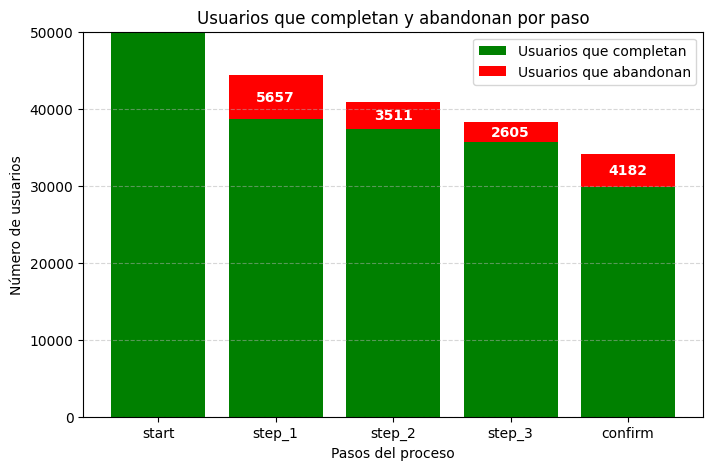

In [178]:
# usuarios_por_paso: número de usuarios que completan cada paso
# abandono: número de usuarios que abandonan en cada paso

pasos_ordenados = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
usuarios_por_paso = usuarios_por_paso.reindex(pasos_ordenados)
abandono = abandono.reindex(pasos_ordenados)

plt.figure(figsize=(8,5))

# Barra de usuarios que completan (verde)
barras_completan = plt.bar(usuarios_por_paso.index, usuarios_por_paso.values, color='green', label='Usuarios que completan')

# Barra de abandono (rojo, apilada)
barras_abandono = plt.bar(usuarios_por_paso.index, abandono.values, color='red',
                          bottom=usuarios_por_paso.values-abandono.values, label='Usuarios que abandonan')

# Mostrar el número de abandonos centrado en la barra roja
for i, val in enumerate(abandono.values):
    if val > 0:  # solo poner etiqueta si hay abandono
        plt.text(i, usuarios_por_paso.values[i]-val/2, str(val),
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Estilo general
plt.ylabel('Número de usuarios')
plt.title('Usuarios que completan y abandonan por paso')
plt.xlabel('Pasos del proceso')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



In [180]:
# Número total de usuarios que empezaron el proceso
total_usuarios = usuarios_por_paso['start']  # normalmente el primer paso

# Porcentaje de usuarios que completan cada paso
porcentaje_completan = usuarios_por_paso / total_usuarios * 100

# Porcentaje de usuarios que abandonan en cada paso
porcentaje_abandono = abandono / total_usuarios * 100


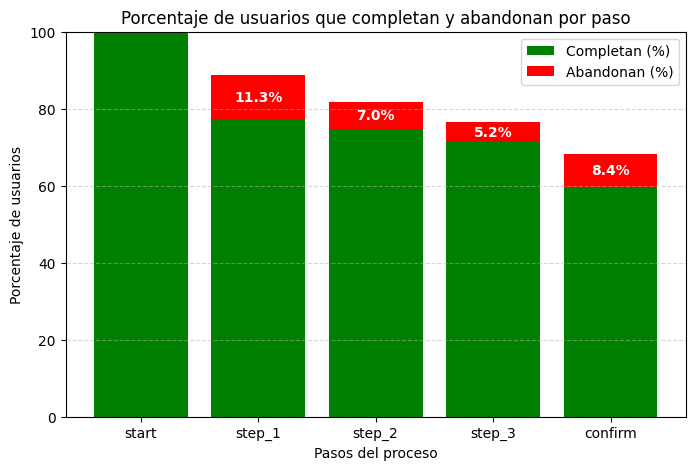

In [181]:
plt.figure(figsize=(8,5))

# Barra de usuarios que completan (verde)
barras_completan = plt.bar(porcentaje_completan.index, porcentaje_completan.values, color='green', label='Completan (%)')

# Barra de abandono (rojo, apilada)
barras_abandono = plt.bar(porcentaje_abandono.index, porcentaje_abandono.values, color='red',
                          bottom=porcentaje_completan.values-porcentaje_abandono.values, label='Abandonan (%)')

# Mostrar el porcentaje de abandono centrado en la barra roja
for i, val in enumerate(porcentaje_abandono.values):
    if val > 0:
        plt.text(i, porcentaje_completan.values[i]-val/2, f"{val:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Estilo general
plt.ylabel('Porcentaje de usuarios')
plt.title('Porcentaje de usuarios que completan y abandonan por paso')
plt.xlabel('Pasos del proceso')
plt.ylim(0, 100)  # Escala de 0 a 100%
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Aquí se puede observar el promedio de porcentaje que abandonan en cada paso en general.

In [182]:
# Contar usuarios que completan cada paso por grupo
usuarios_por_paso_grupo = muestra.groupby(['Variation', 'process_step'])['client_id'].nunique().unstack(level=0)

# Ordenar los pasos
pasos_ordenados = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
usuarios_por_paso_grupo = usuarios_por_paso_grupo.reindex(pasos_ordenados)

# Número total de usuarios por grupo (tomamos el primer paso)
total_usuarios = usuarios_por_paso_grupo.loc['start']


In [183]:
# Porcentaje de retención por grupo
retencion = usuarios_por_paso_grupo / total_usuarios * 100

# Porcentaje de abandono por grupo
abandono = 100 - retencion


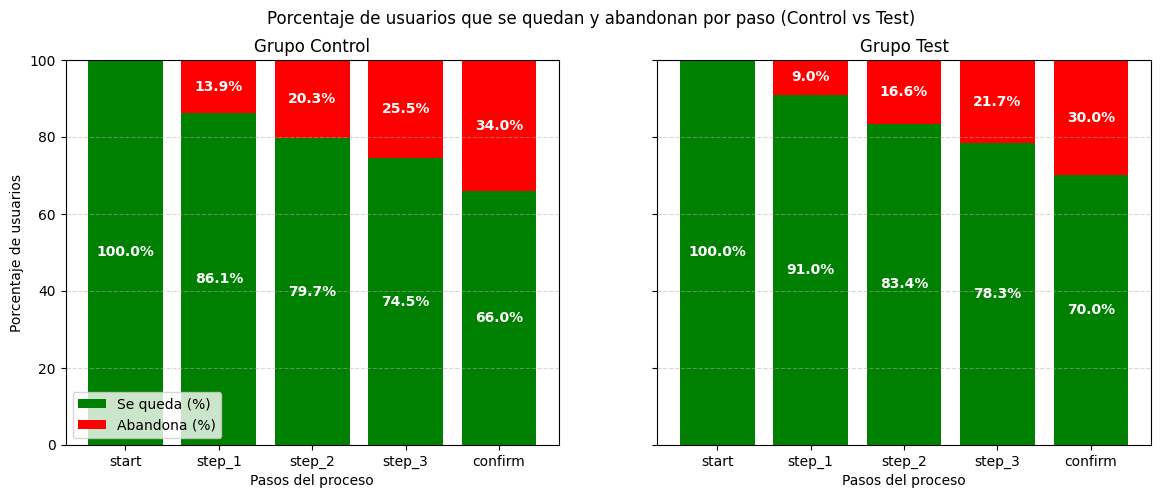

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

grupos = ['Control', 'Test']
colores = ['green', 'red']

for ax, grupo in zip(axes, grupos):
    # Barras de retención (usuarios que se quedan)
    ax.bar(retencion.index, retencion[grupo], color='green', label='Se queda (%)')
    
    # Barras de abandono (apiladas sobre la retención)
    ax.bar(abandono.index, abandono[grupo], color='red',
           bottom=retencion[grupo], label='Abandona (%)')
    
    # Etiquetas de abandono dentro de la barra roja
    for i, val in enumerate(abandono[grupo].values):
        if val > 0:
            ax.text(i, retencion[grupo].values[i] + val/2, f"{val:.1f}%", 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    # Etiquetas de retención dentro de la barra verde
    for i, val in enumerate(retencion[grupo].values):
        if val > 0:
            ax.text(i, val/2, f"{val:.1f}%", ha='center', va='center', 
                    color='white', fontsize=10, fontweight='bold')
    
    ax.set_title(f'Grupo {grupo}')
    ax.set_xlabel('Pasos del proceso')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes[0].set_ylabel('Porcentaje de usuarios')
axes[0].legend()
plt.suptitle('Porcentaje de usuarios que se quedan y abandonan por paso (Control vs Test)')
plt.show()


### Retención y abandono por paso: Control vs Test

El gráfico muestra el porcentaje de usuarios que completan cada paso del proceso (retención) y los que abandona (abandono), comparando los grupos Control y Test.

Interpretación de los resultados

🟢 Barras verdes: porcentaje de usuarios que completan cada paso (retención).

🔴 Barras rojas: porcentaje de usuarios que abandonan en ese paso.

Los números dentro de la barra roja indican el % exacto de abandono en ese paso.

##### Observaciones clave

Comparación Control vs Test:

- En todos los pasos, el grupo Test muestra mayor retención que el Control.

- Esto indica que más usuarios completan el proceso en el Test, reflejando mejoras en la experiencia o flujo del Test respecto al Control.

## UNIÓN Y MODIFICACIÓN DE TODOS LOS CSV.

In [188]:
tabla_final = pd.merge(muestra, demo_unido, on='client_id', how='inner')

In [190]:
columnas_a_eliminar = ['Variation_y', 'tiempo_min', 'visitor_id', 'visit_id', 'date', 'time']

# Elimina solo las que existan (para evitar errores si alguna no está)
tabla_final = tabla_final.drop(columns=[col for col in columnas_a_eliminar if col in tabla_final.columns])


In [192]:
tabla_final = tabla_final.rename(columns={'Variation_x': 'Variation'})


In [194]:
columnas_redondear = ['tiempo_entre_pasos_min', 'Q5', 'Q95']

for col in columnas_redondear:
    if col in tabla_final.columns:
        tabla_final[col] = tabla_final[col].round(2)


In [196]:
tabla_final.to_csv('tabla_final.csv', index=False)
